## Import

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('covid_combined_data.csv')
df['date'] = pd.to_datetime(df['date'])
df['Q'] = df['date'].dt.to_period('Q').astype(str)
countries_df = pd.read_csv('countries_combined_data.csv')

## Część 1

Wyznacz średnią kroczącą i odchylenie standardowe kroczące (np. 7-dniowe), aby zobaczyć, jak te zjawiska zmieniają się w czasie. Obliczenia wykonaj dla:


1.1. liczby nowych zachorowań,



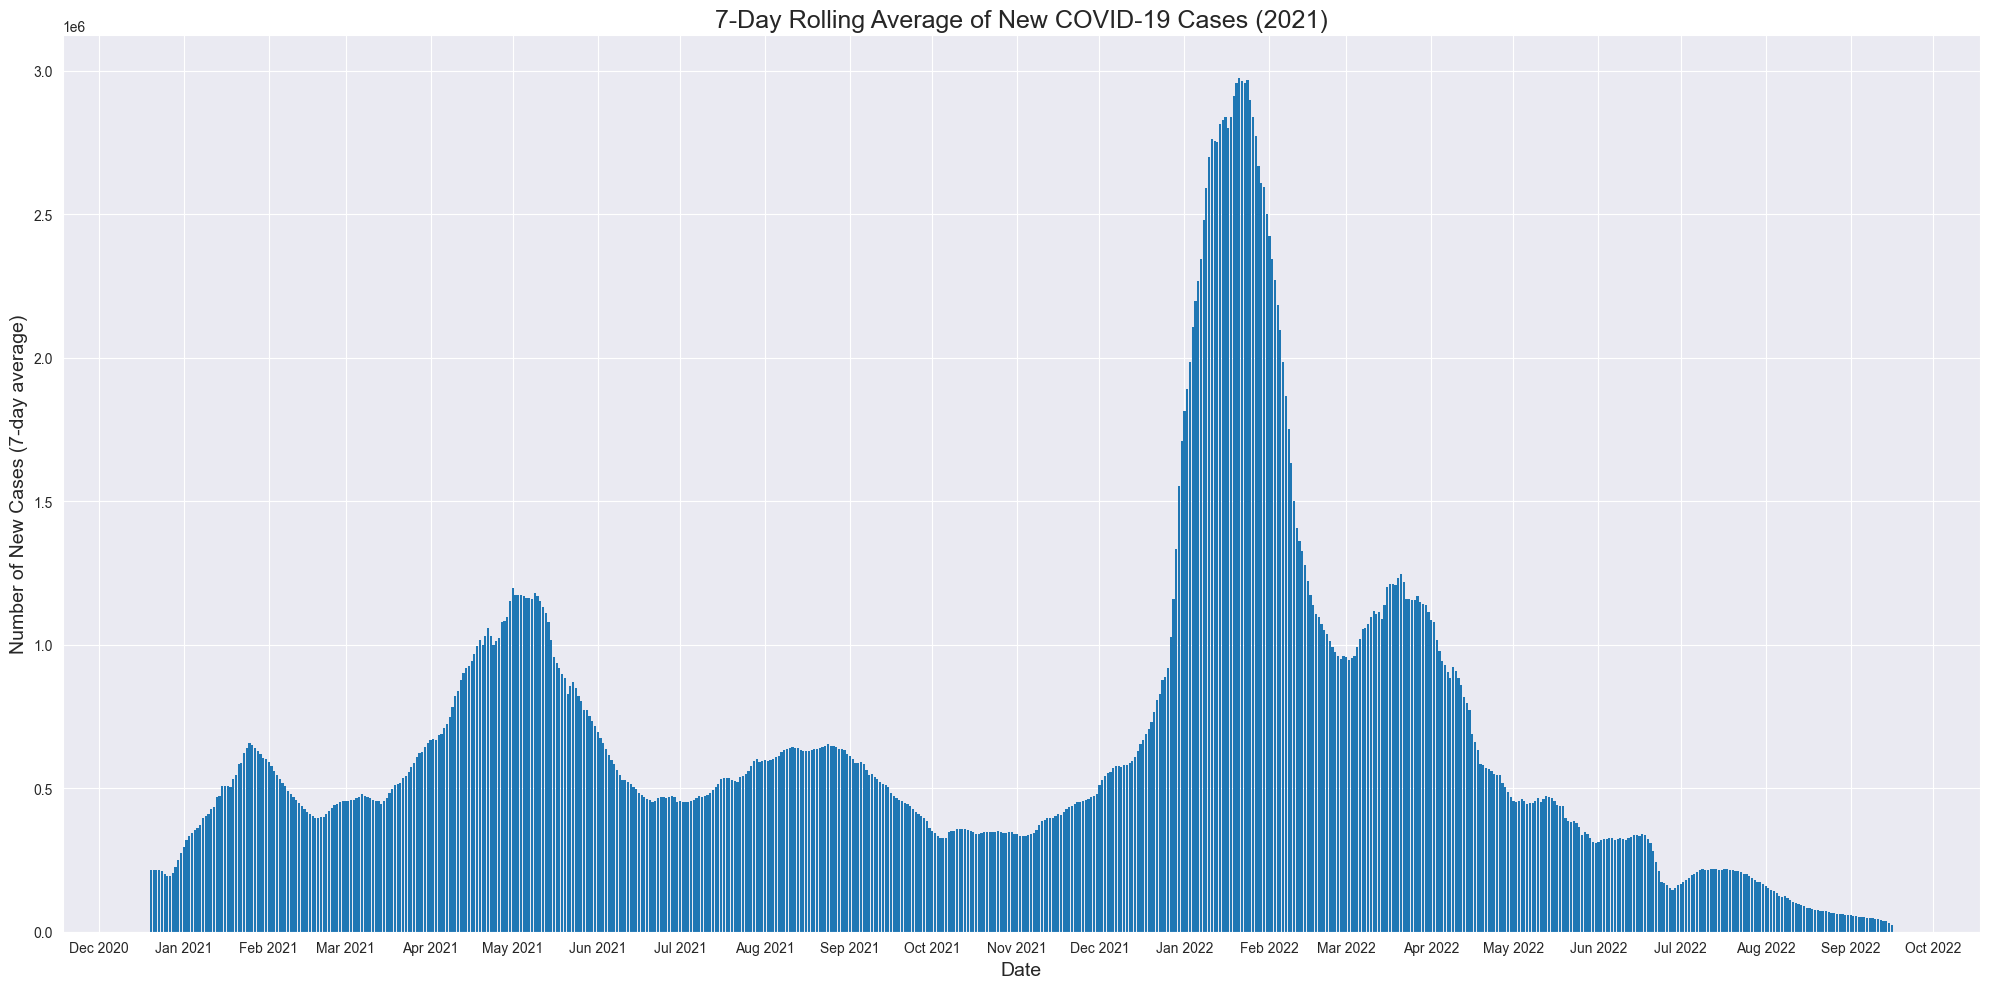

In [67]:
df_daily = df[df['subregion1_name_x'].isna()]
df_daily = df.set_index('date').resample('D').sum()
df_daily['rolling_mean'] = df_daily['new_confirmed'].rolling(window=7).mean()
df_daily = df_daily.reset_index()  # Reset index to make 'date' a column again

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_mean'], edgecolor='none')  # Remove black outline

# Add title and axis labels
plt.title('7-Day Rolling Average of New COVID-19 Cases (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Cases (7-day average)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # 'Jan 2025', 'Feb 2025', etc.
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show every month
plt.tight_layout()
plt.show()

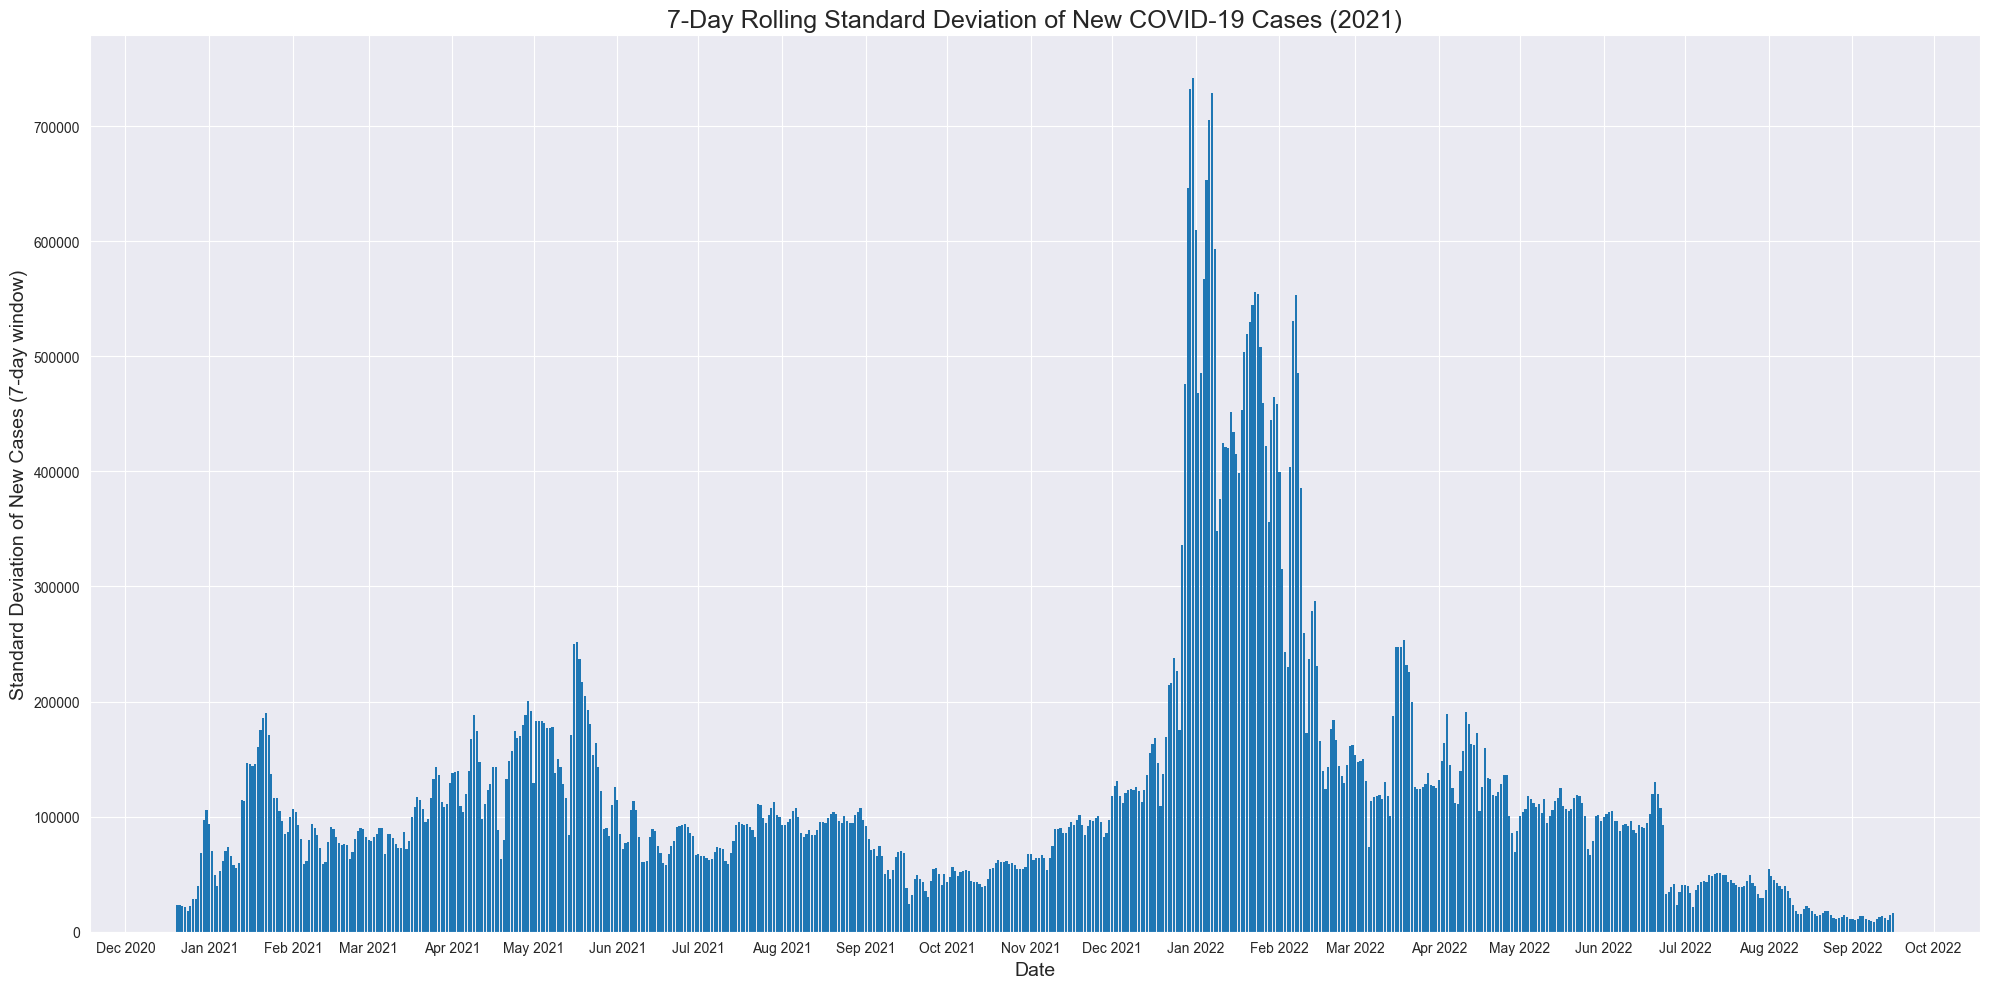

In [68]:
# Calculate 7-day rolling standard deviation for new confirmed cases
df_daily['rolling_std'] = df_daily['new_confirmed'].rolling(window=7).std()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_std'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Standard Deviation of New COVID-19 Cases (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standard Deviation of New Cases (7-day window)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

1.2. liczby nowych śmierci,



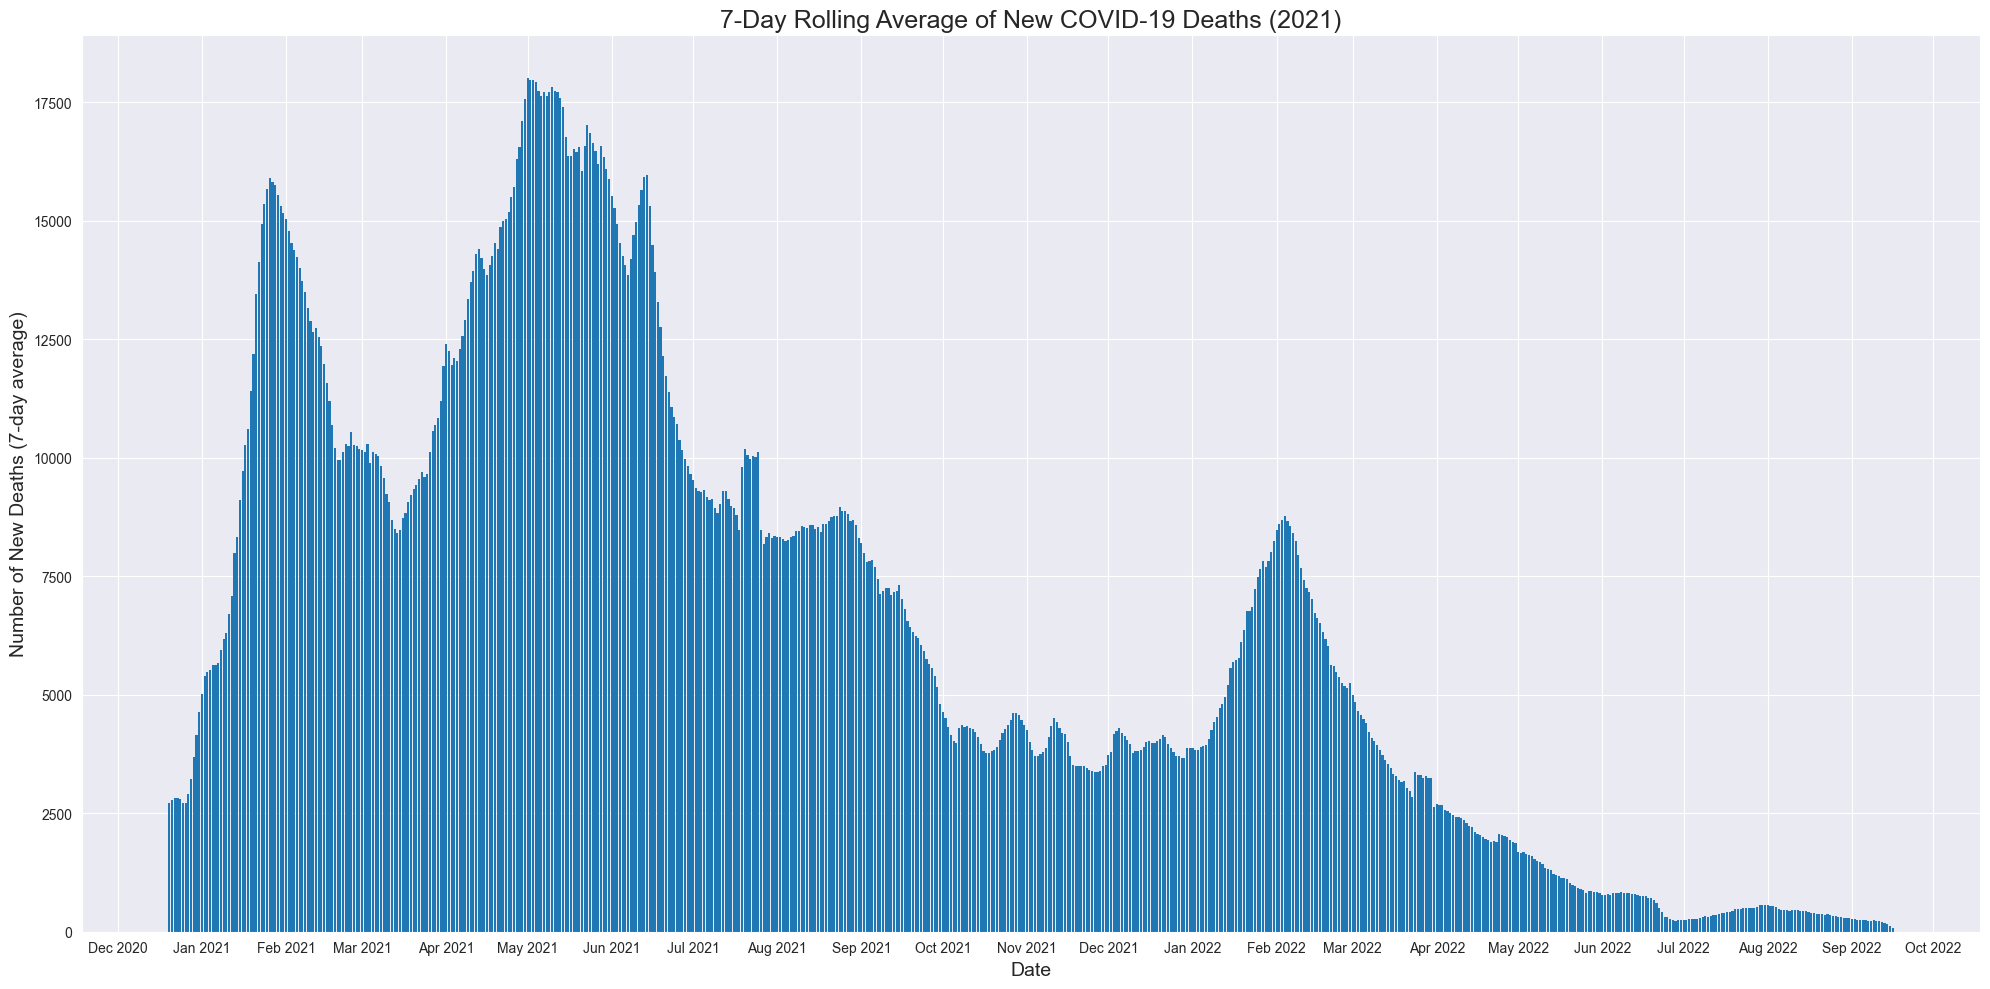

In [69]:
# Calculate 7-day rolling mean for new deaths
df_daily['rolling_mean_deaths'] = df_daily['new_deceased'].rolling(window=7).mean()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_mean_deaths'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Average of New COVID-19 Deaths (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Deaths (7-day average)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

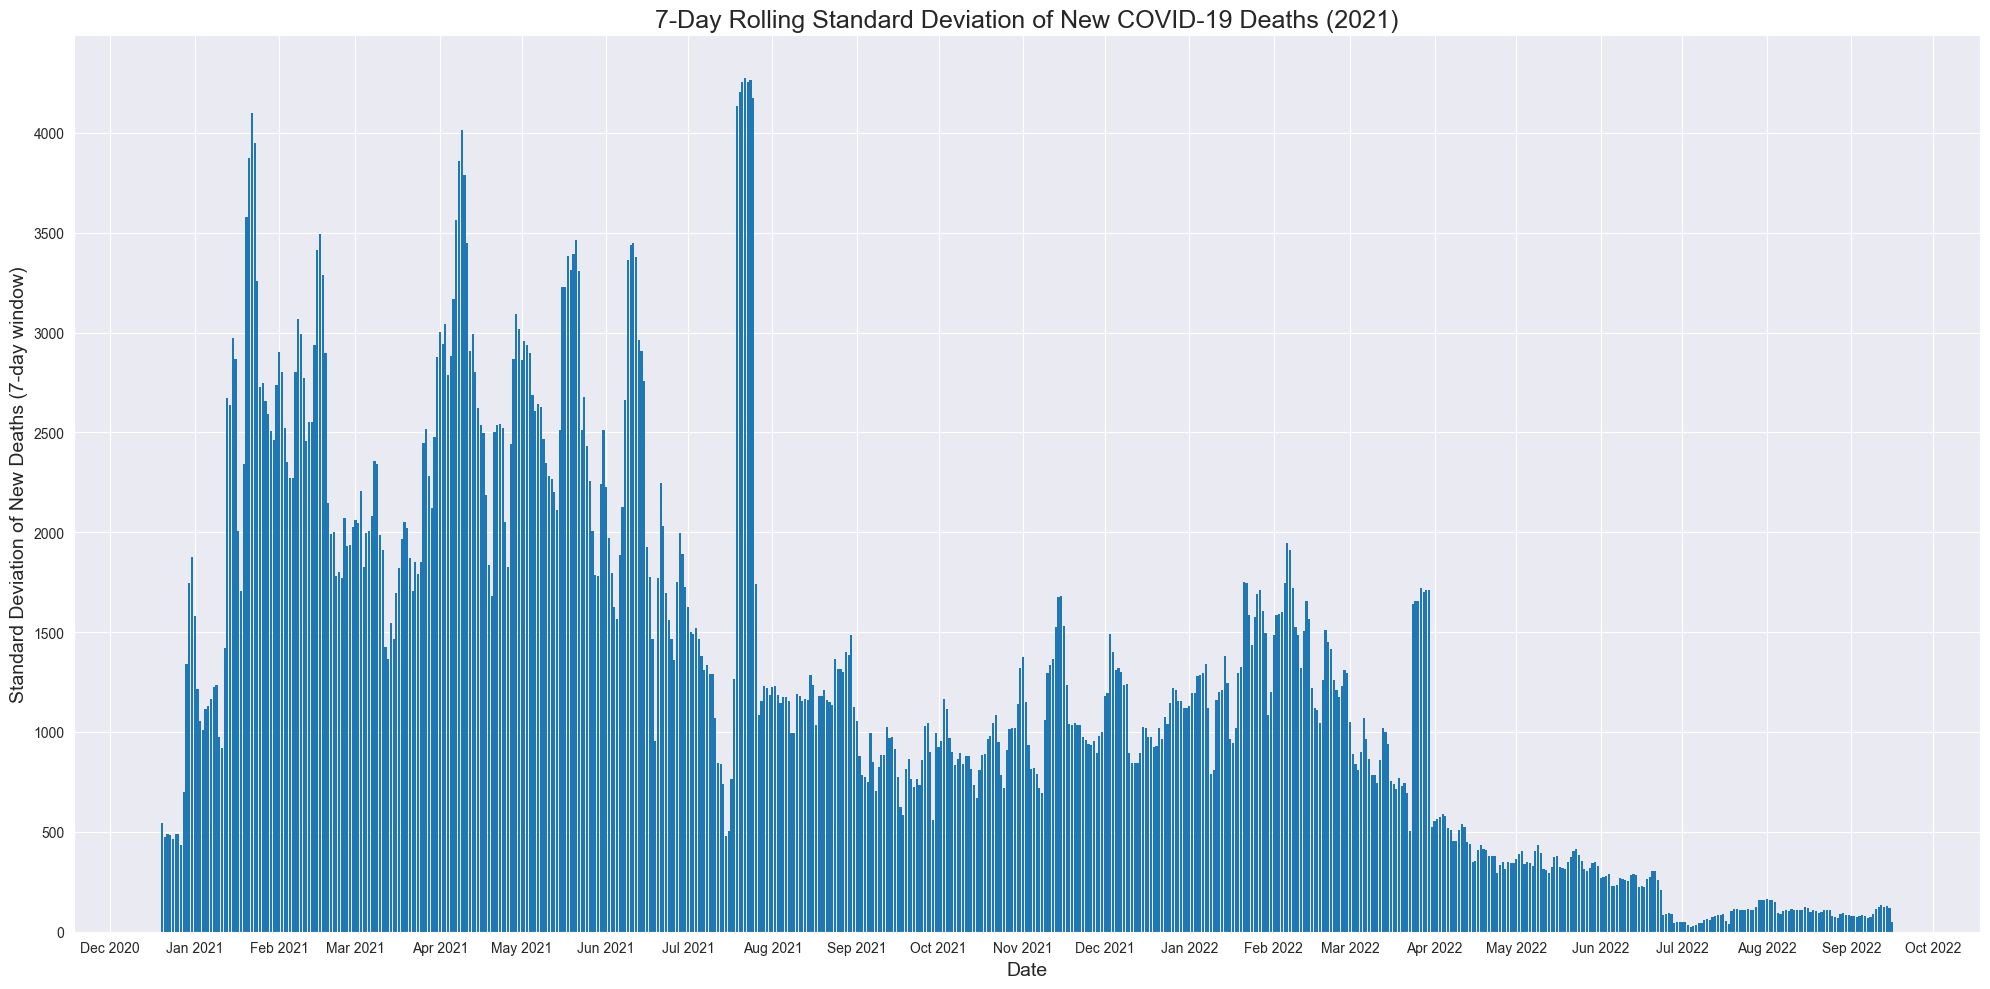

In [70]:
# Calculate 7-day rolling standard deviation for new deaths
df_daily['rolling_std_deaths'] = df_daily['new_deceased'].rolling(window=7).std()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_std_deaths'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Standard Deviation of New COVID-19 Deaths (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standard Deviation of New Deaths (7-day window)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

1.3. liczby nowych szczepień,



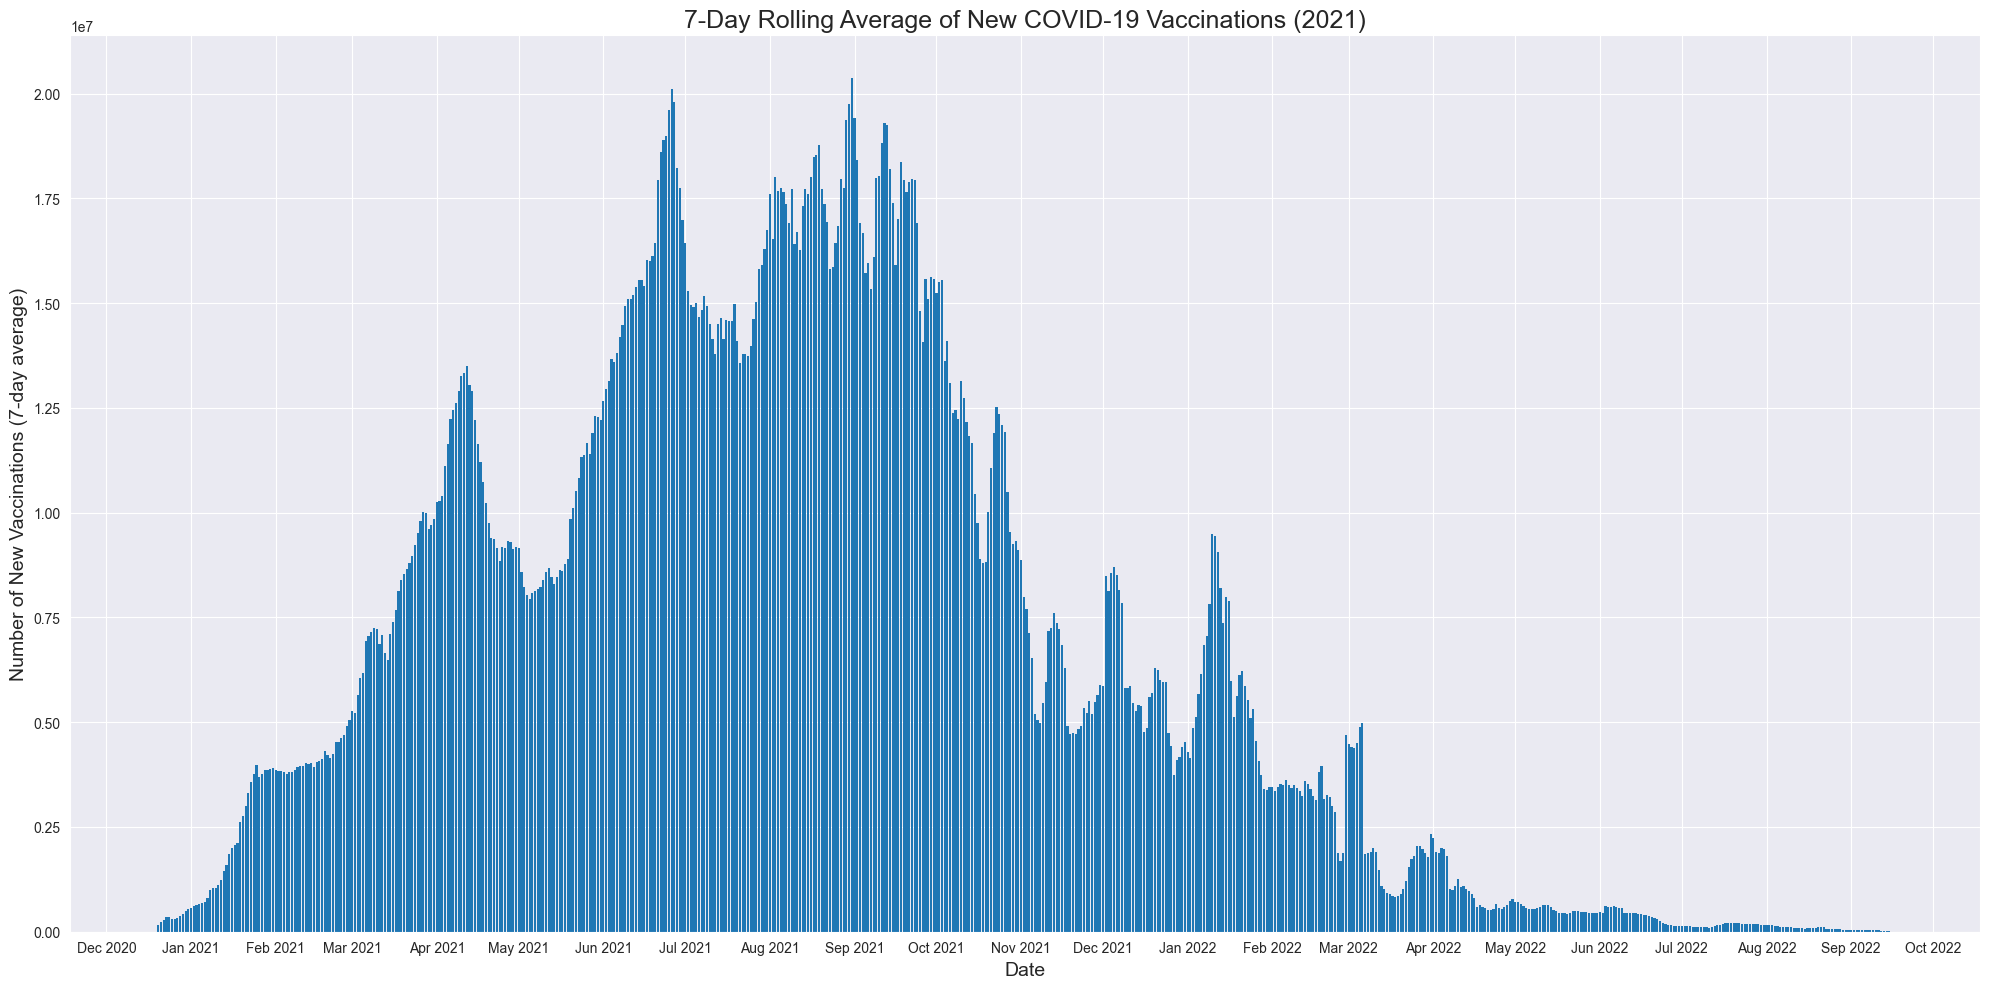

In [71]:
# Calculate 7-day rolling mean for new vaccinations
df_daily['rolling_mean_vaccinations'] = df_daily['new_persons_vaccinated'].rolling(window=7).mean()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_mean_vaccinations'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Average of New COVID-19 Vaccinations (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Vaccinations (7-day average)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

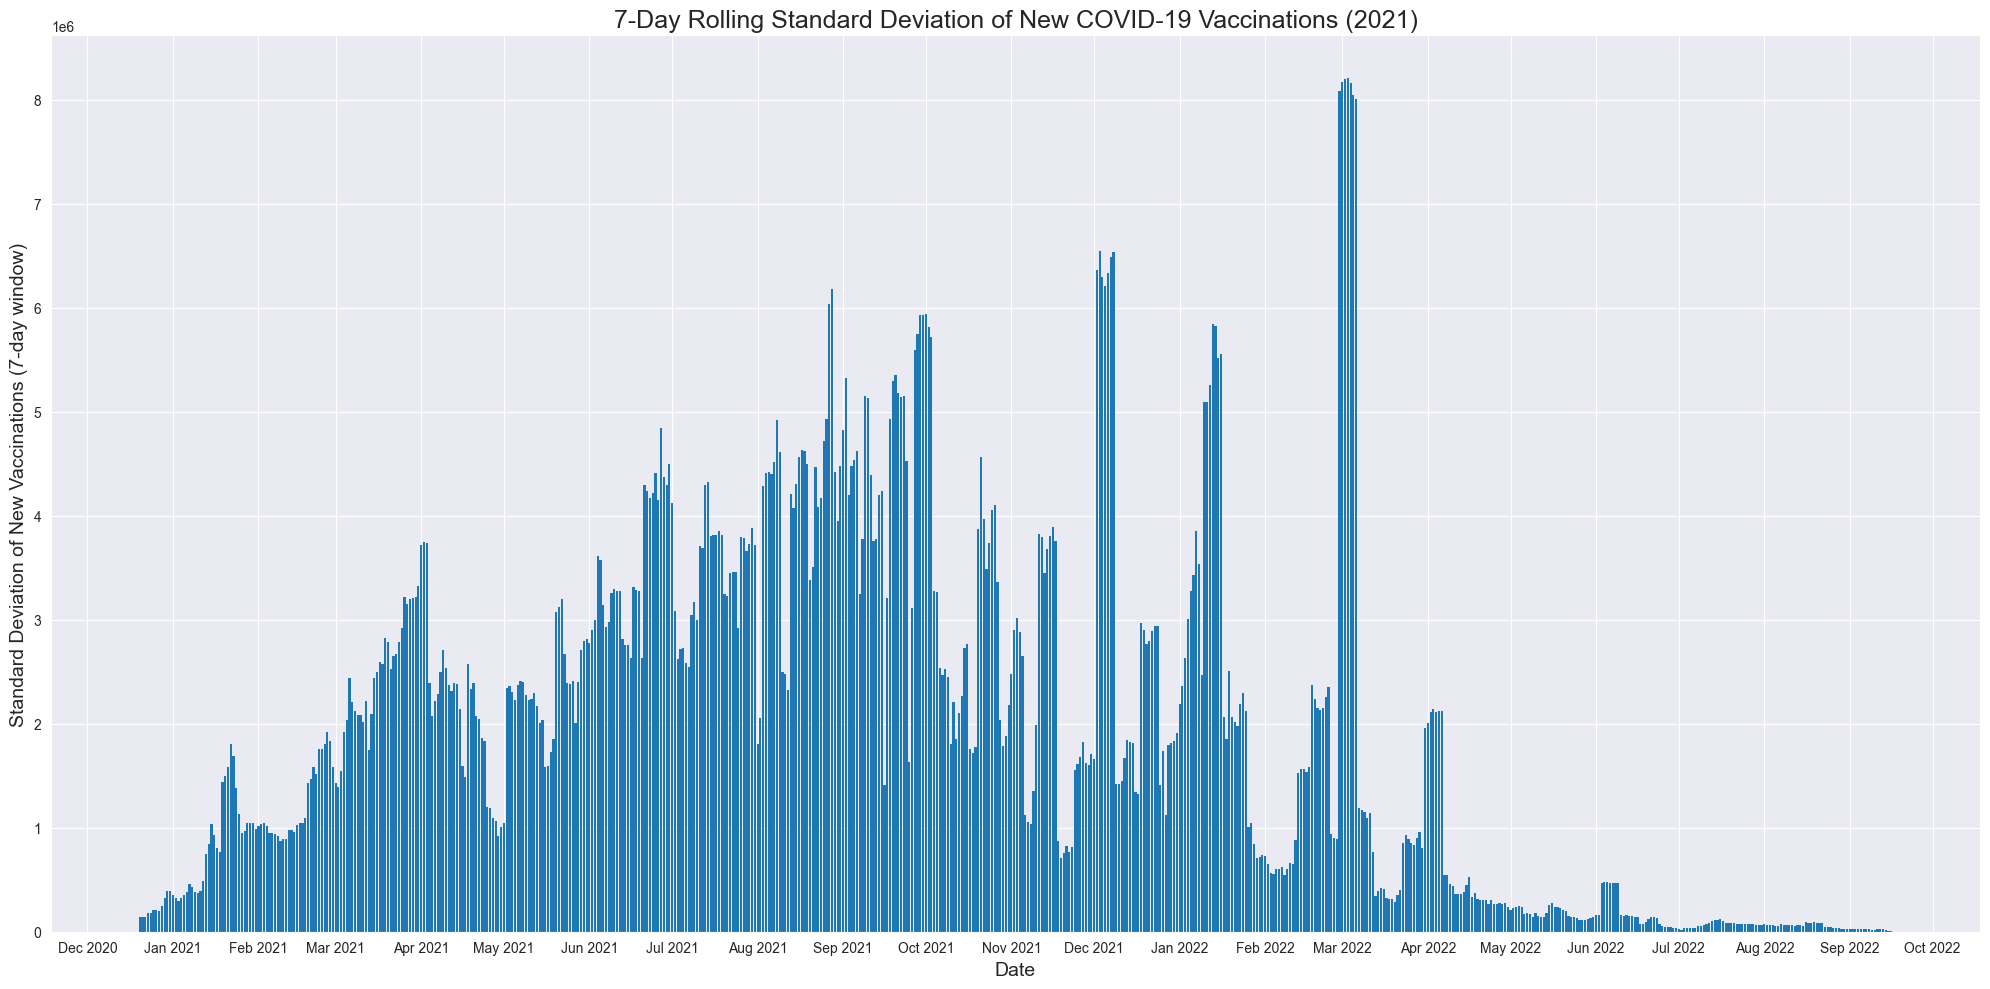

In [72]:
# Calculate 7-day rolling standard deviation for new vaccinations
df_daily['rolling_std_vaccinations'] = df_daily['new_persons_vaccinated'].rolling(window=7).std()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_std_vaccinations'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Standard Deviation of New COVID-19 Vaccinations (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standard Deviation of New Vaccinations (7-day window)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

1.4.1 liczba osób w pełni zaszczepionych



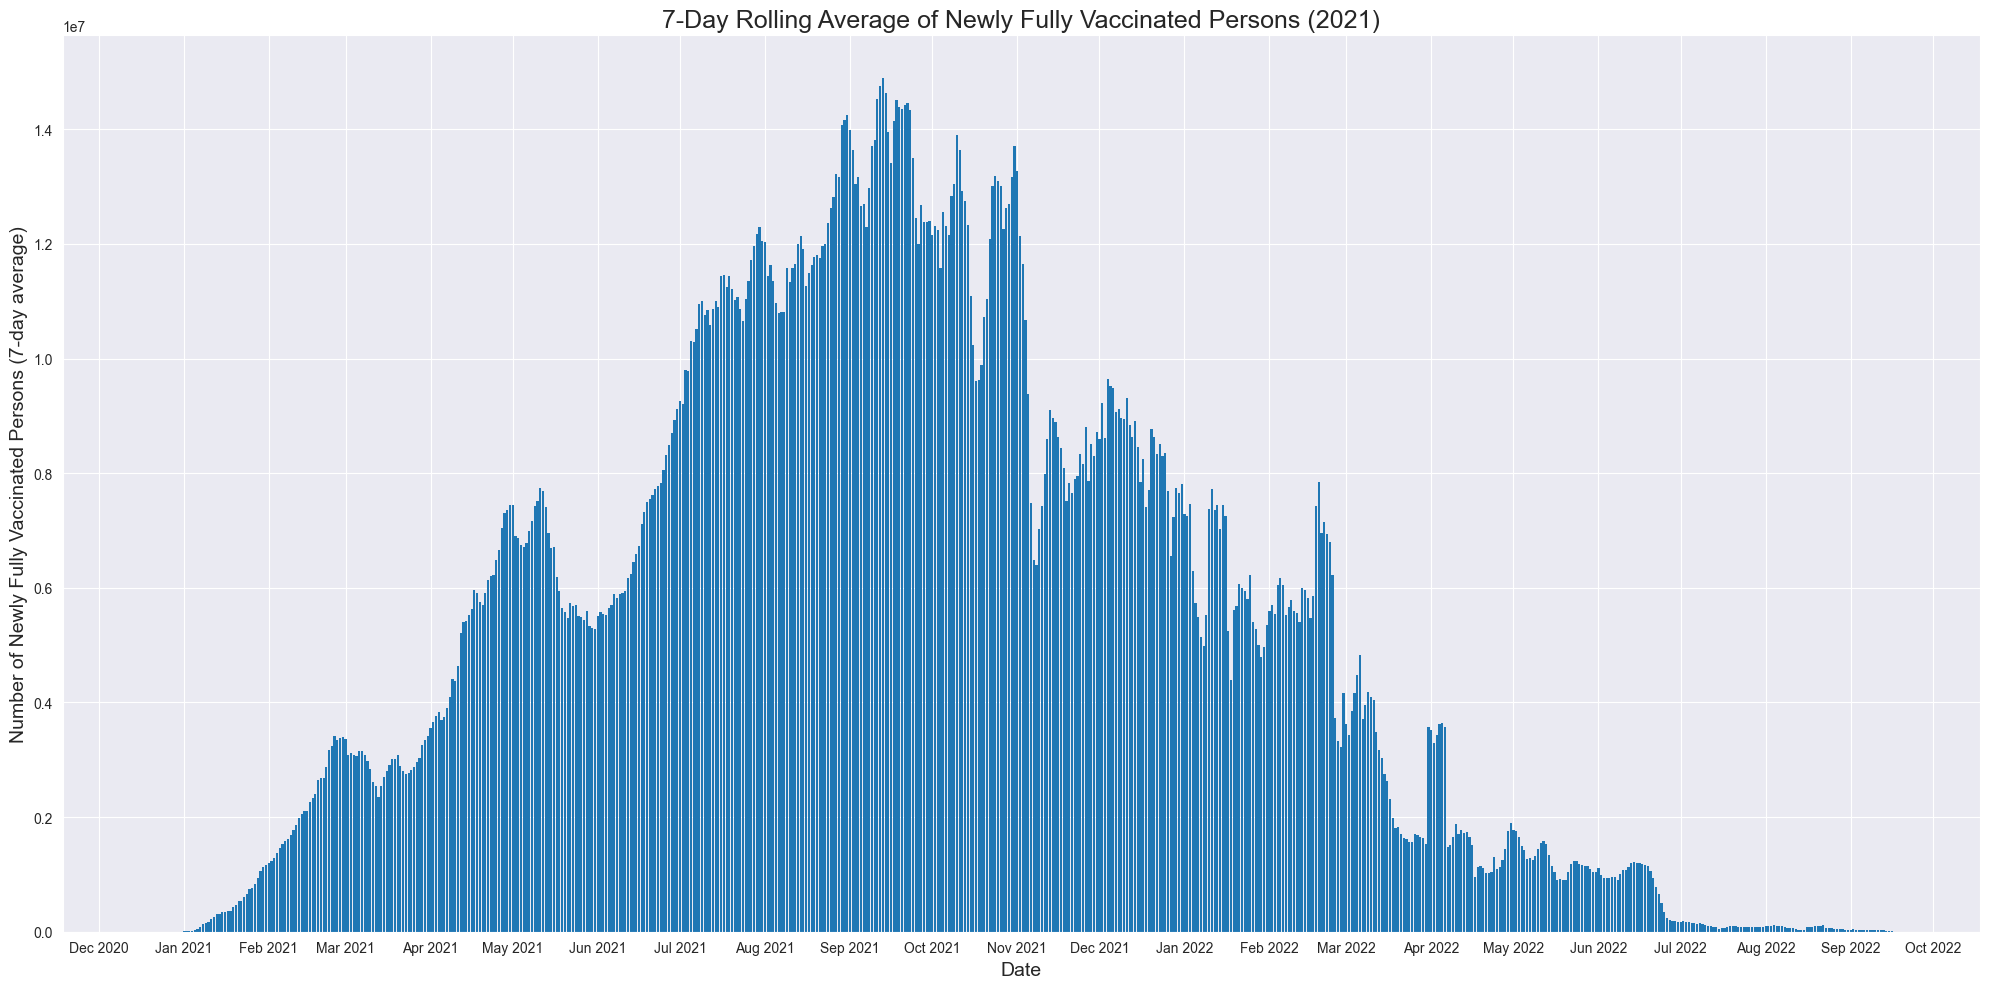

In [73]:
# Calculate 7-day rolling mean for fully vaccinated persons
df_daily['rolling_mean_fully_vaccinated'] = df_daily['new_persons_fully_vaccinated'].rolling(window=7).mean()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_mean_fully_vaccinated'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Average of Newly Fully Vaccinated Persons (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Newly Fully Vaccinated Persons (7-day average)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

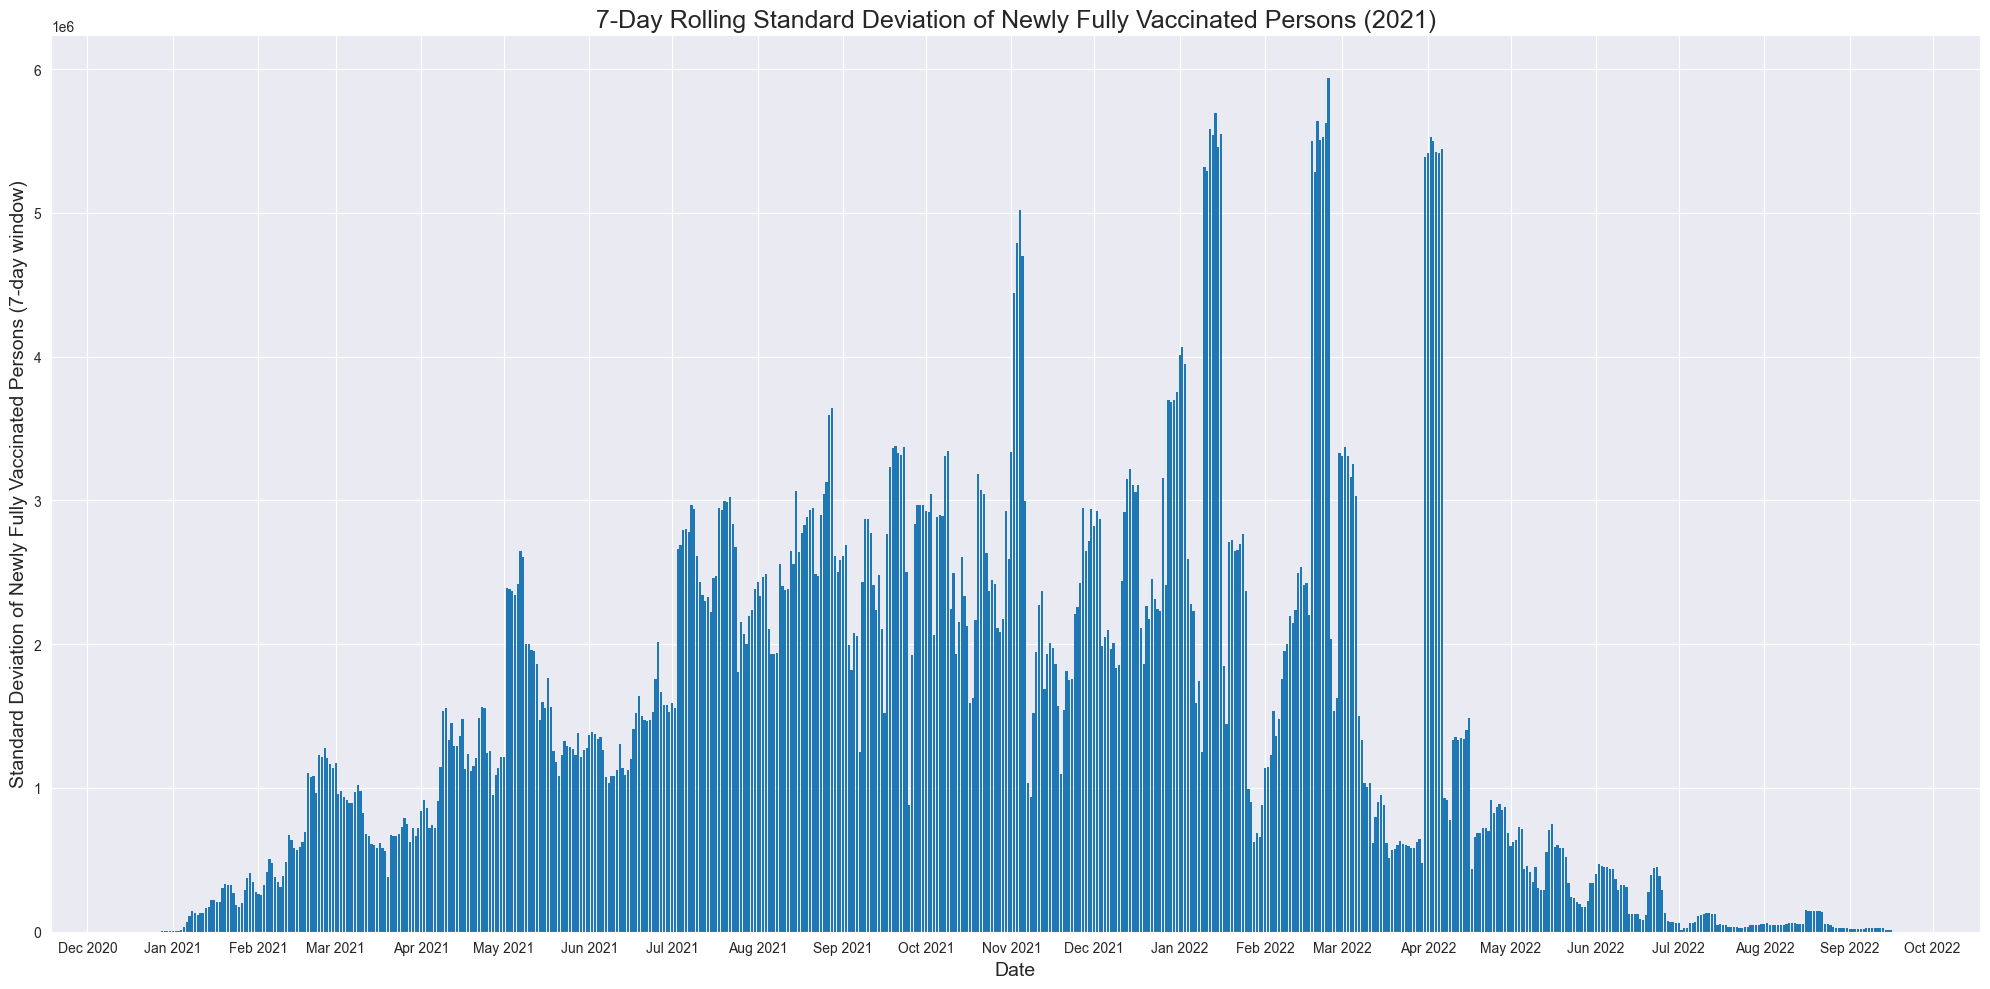

In [74]:
# Calculate 7-day rolling standard deviation for fully vaccinated persons
df_daily['rolling_std_fully_vaccinated'] = df_daily['new_persons_fully_vaccinated'].rolling(window=7).std()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_std_fully_vaccinated'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Standard Deviation of Newly Fully Vaccinated Persons (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standard Deviation of Newly Fully Vaccinated Persons (7-day window)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

1.4.2 liczba zaaplikowanych szczepionek



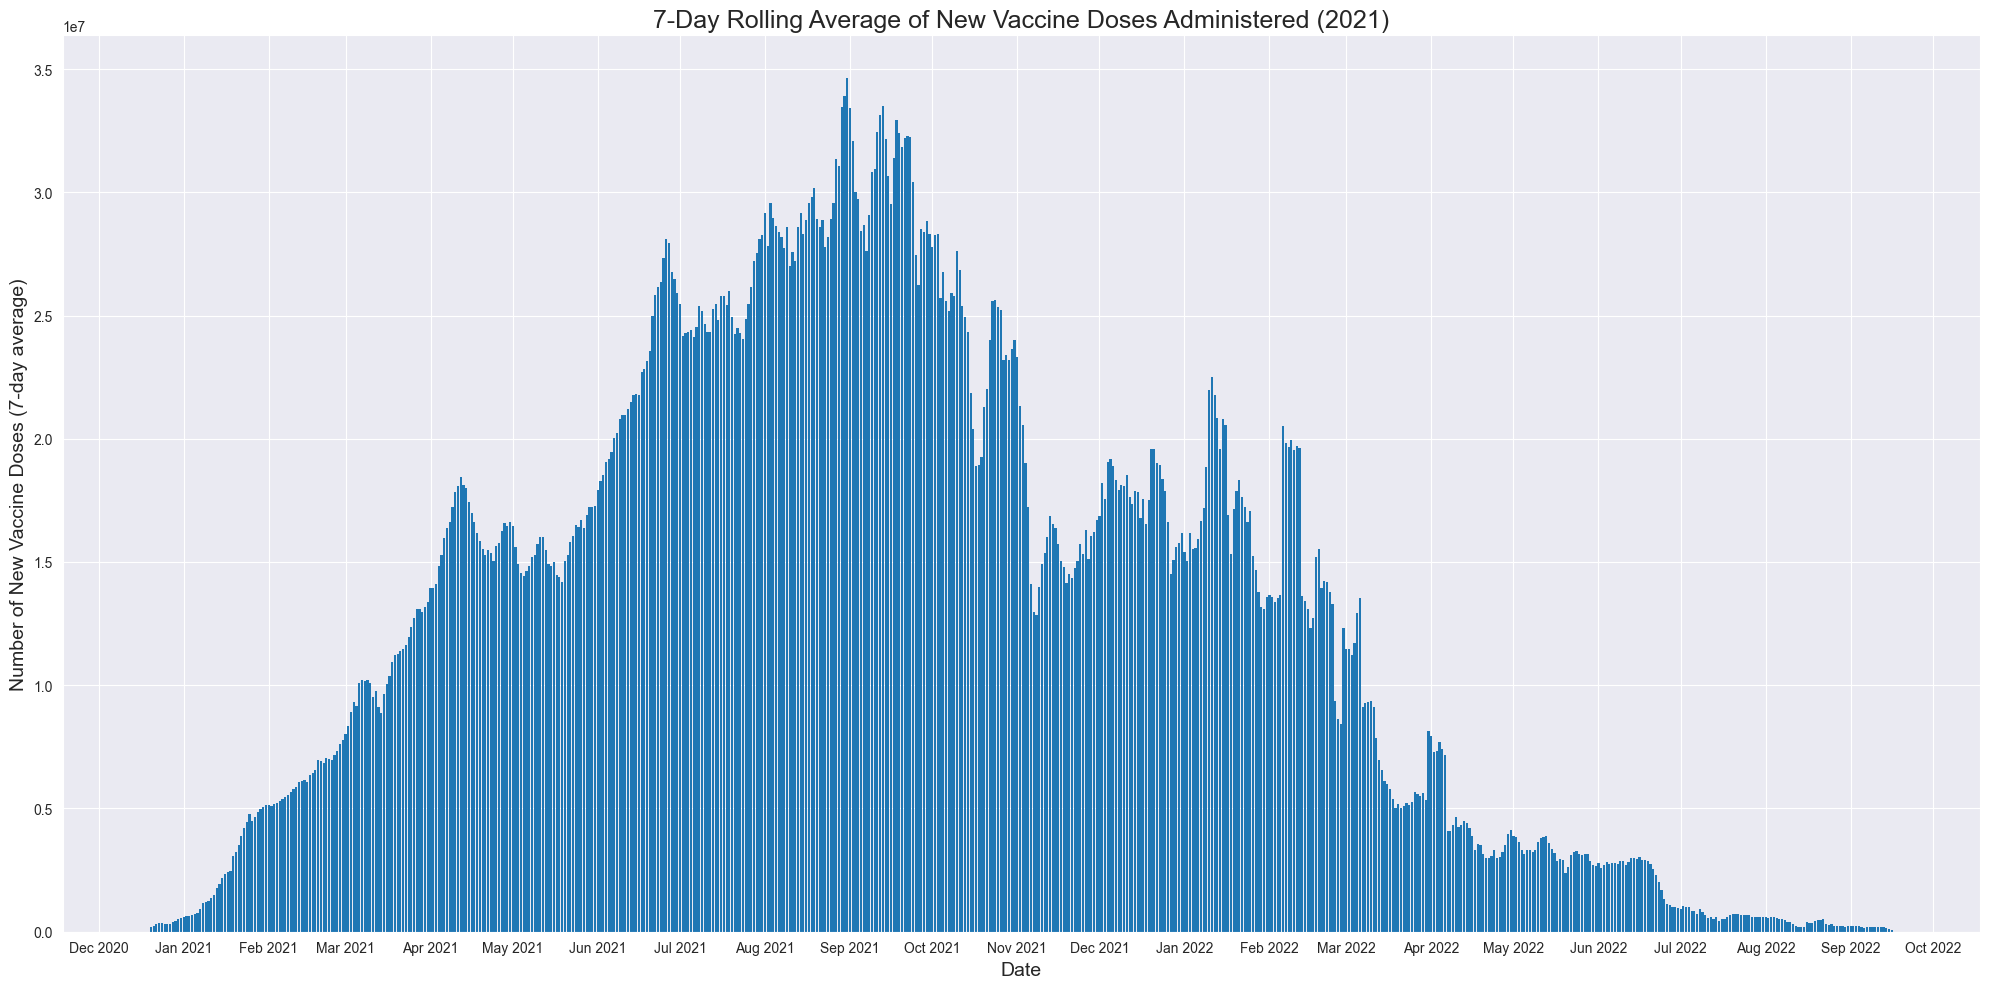

In [75]:
# Calculate 7-day rolling mean for vaccine doses administered
df_daily['rolling_mean_doses'] = df_daily['new_vaccine_doses_administered'].rolling(window=7).mean()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_mean_doses'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Average of New Vaccine Doses Administered (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Vaccine Doses (7-day average)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

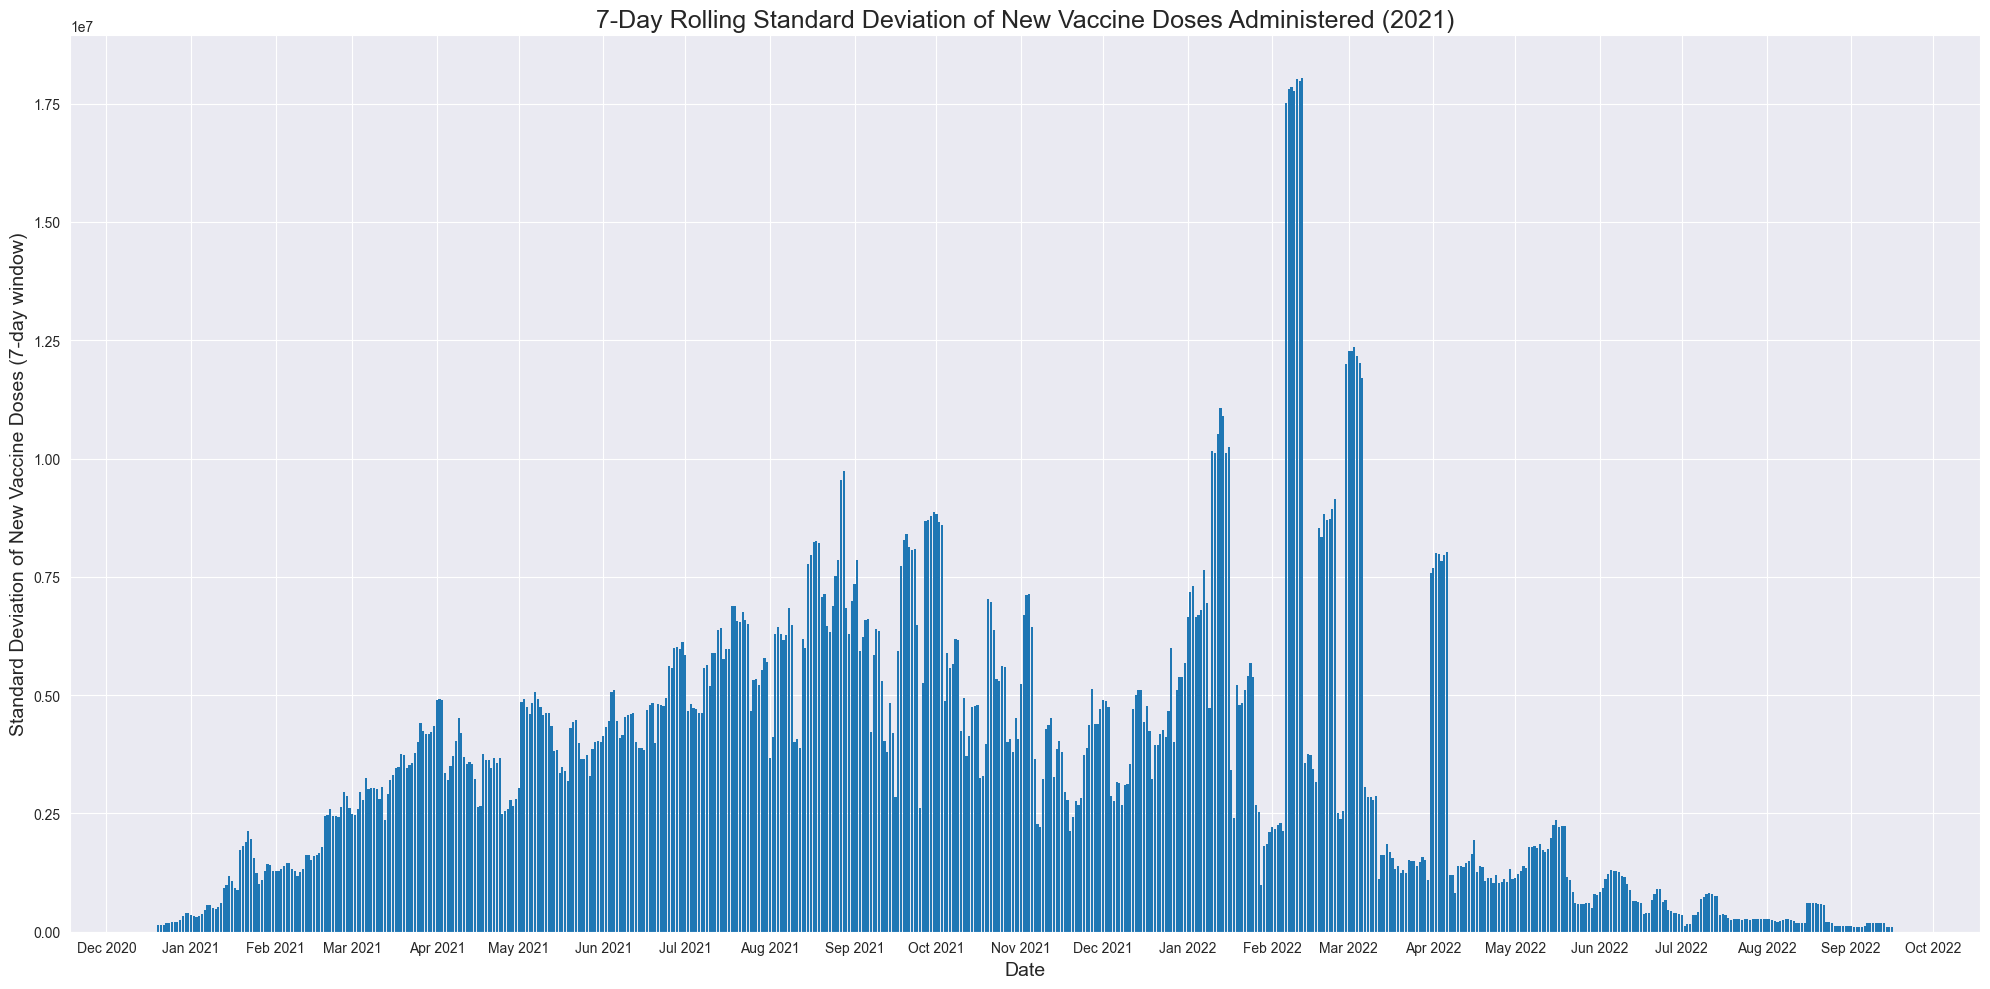

In [76]:
# Calculate 7-day rolling standard deviation for vaccine doses administered
df_daily['rolling_std_doses'] = df_daily['new_vaccine_doses_administered'].rolling(window=7).std()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_std_doses'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Standard Deviation of New Vaccine Doses Administered (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standard Deviation of New Vaccine Doses (7-day window)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()


## Część 2

2.1 Analiza szeregu czasowego liczby nowych zachorowań

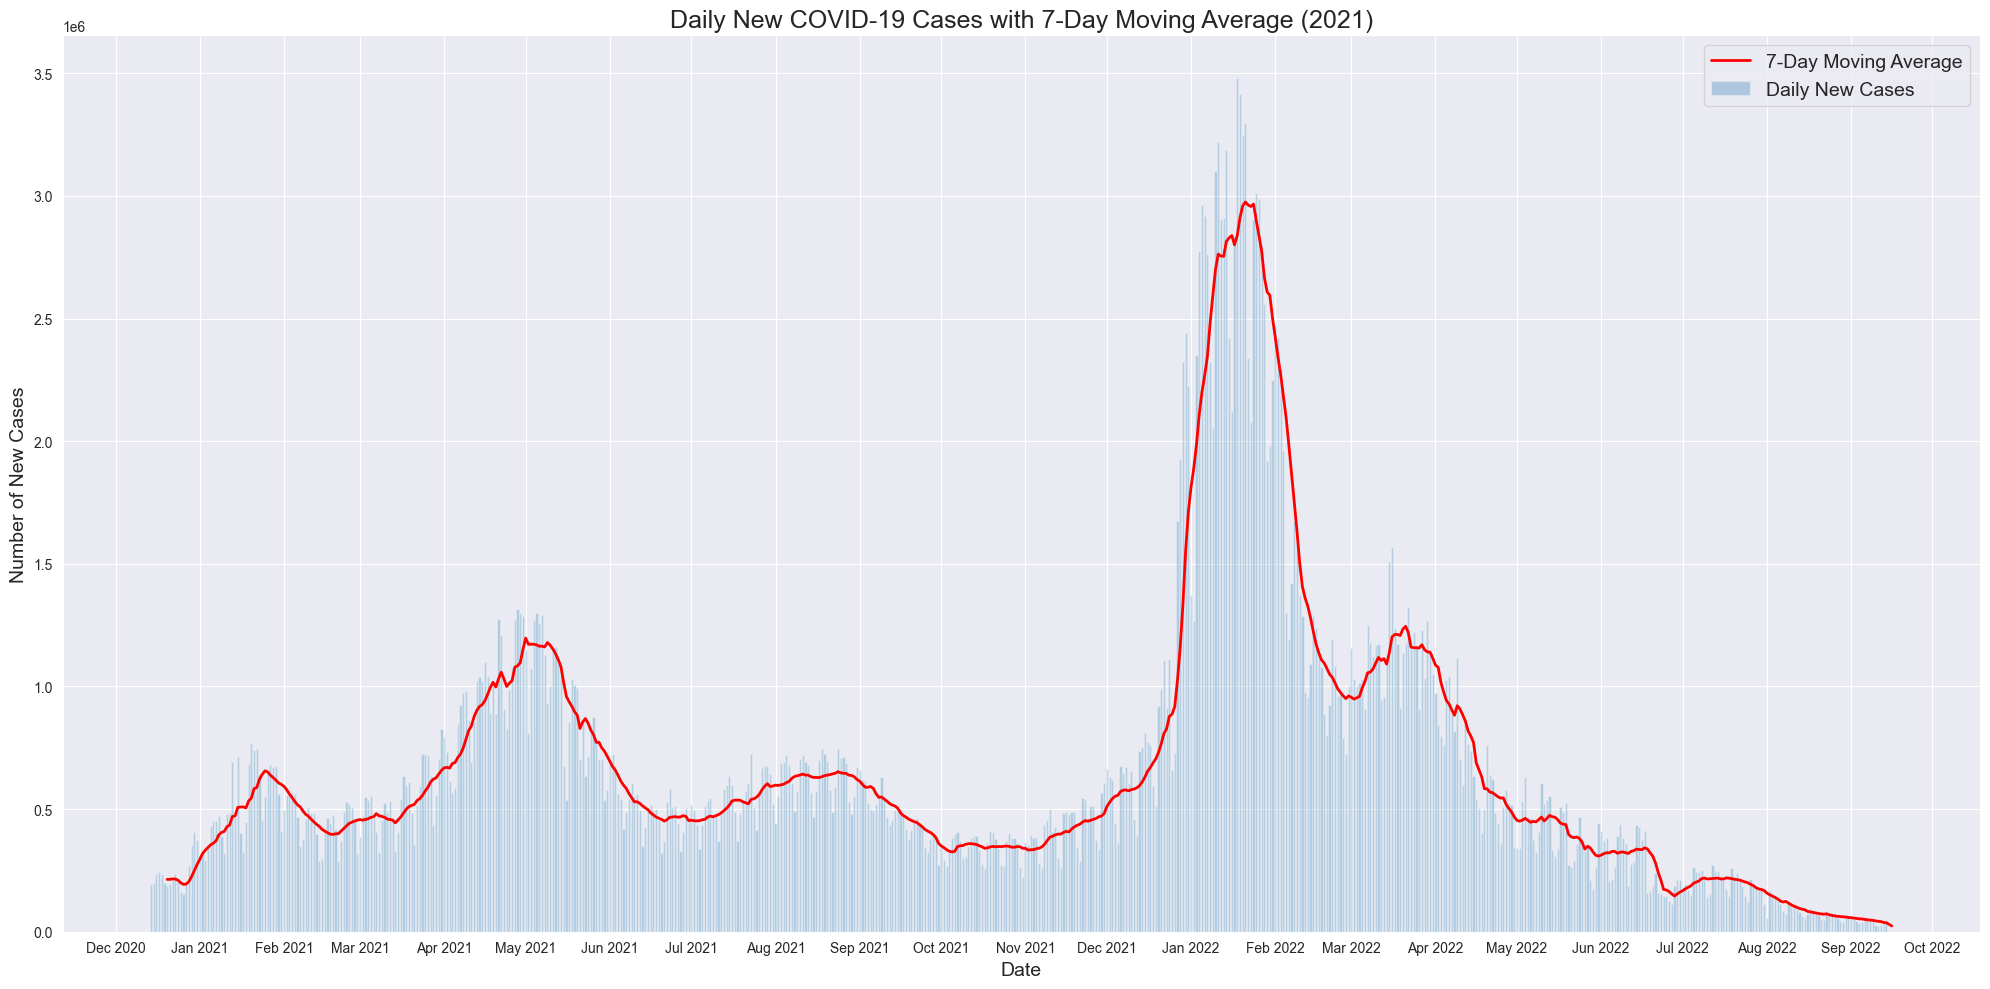

In [77]:
# Prepare data for time series analysis
# We'll use the 'new_confirmed' column from df_daily
ts_new_cases = df_daily.set_index('date')['new_confirmed']

# Overlay moving average on part 1 visualization
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['new_confirmed'], alpha=0.3, label='Daily New Cases')
plt.plot(df_daily['date'], df_daily['rolling_mean'], color='red', linewidth=2, label='7-Day Moving Average')

# Add title and axis labels
plt.title('Daily New COVID-19 Cases with 7-Day Moving Average (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Cases', fontsize=14)
plt.legend(fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()


2.2 Analiza szeregu czasowego liczby nowych śmierci

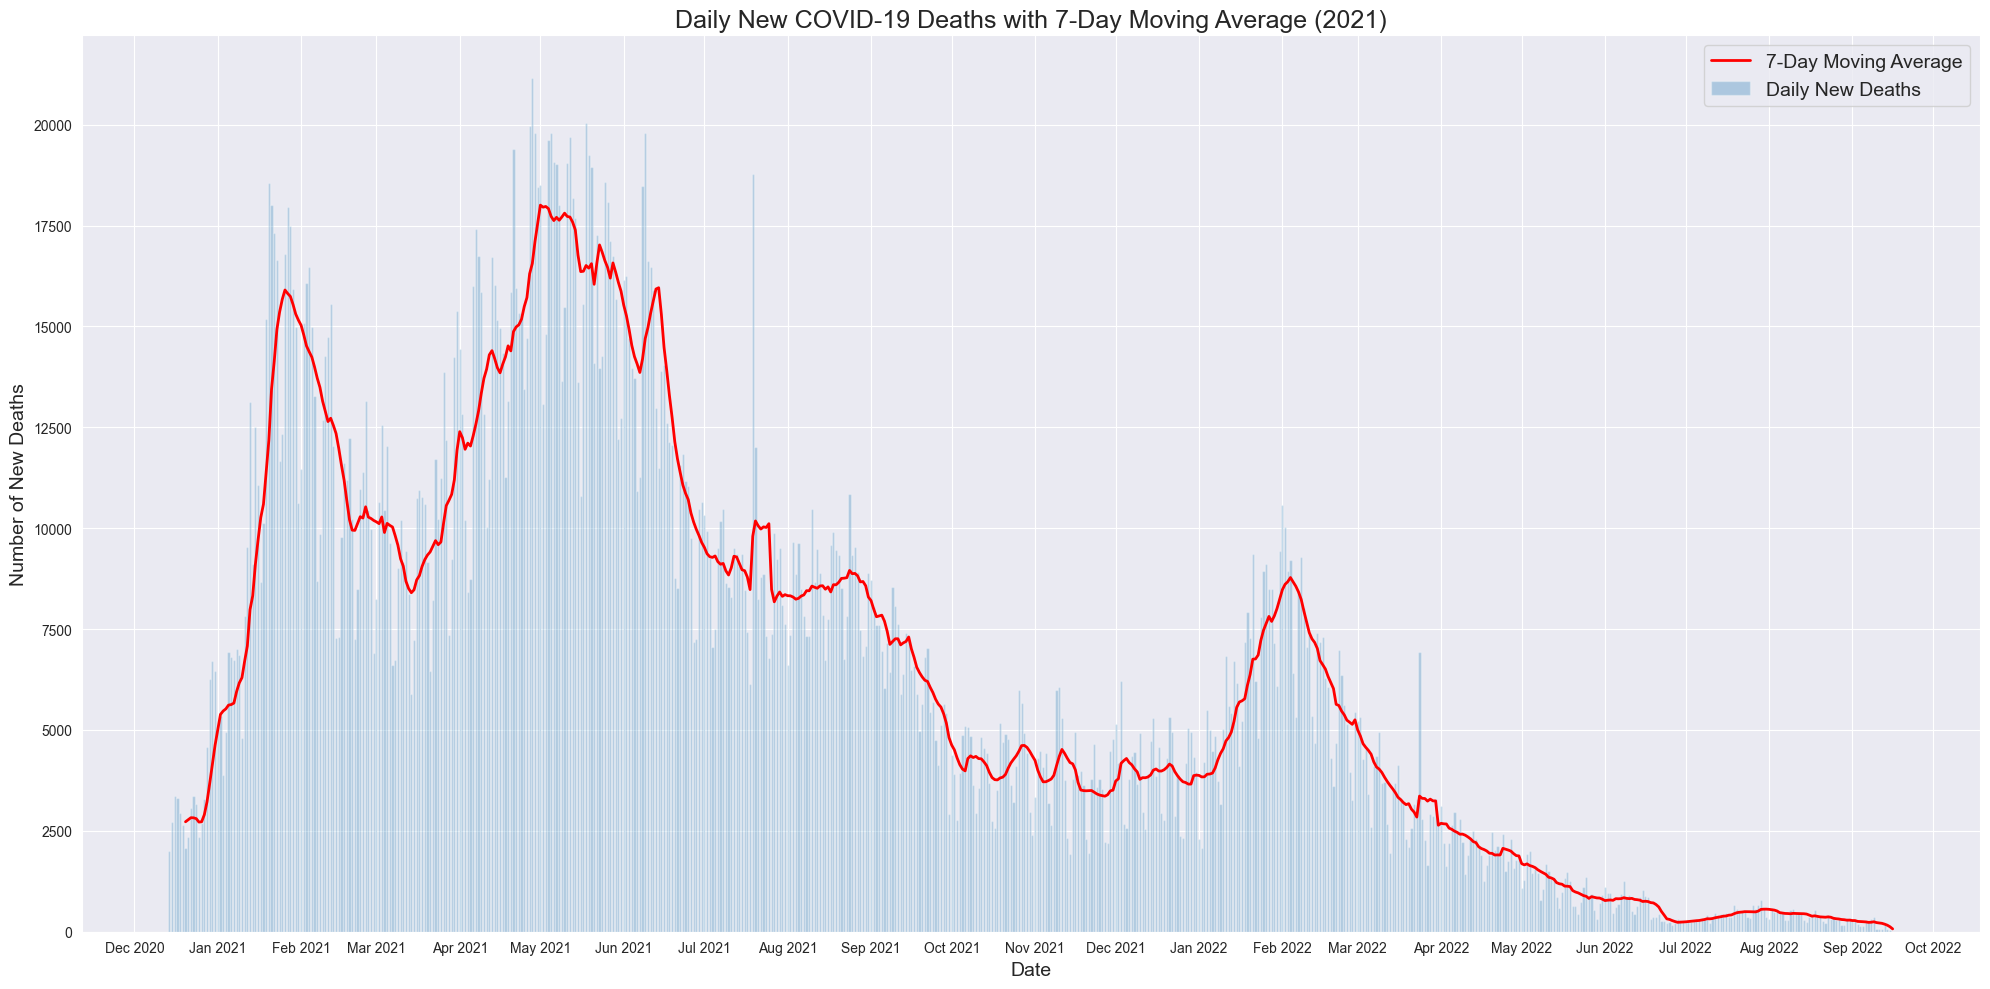

In [78]:
# Prepare data for time series analysis
# We'll use the 'new_deceased' column from df_daily
ts_new_deaths = df_daily.set_index('date')['new_deceased']

# Overlay moving average on part 1 visualization
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['new_deceased'], alpha=0.3, label='Daily New Deaths')
plt.plot(df_daily['date'], df_daily['rolling_mean_deaths'], color='red', linewidth=2, label='7-Day Moving Average')

# Add title and axis labels
plt.title('Daily New COVID-19 Deaths with 7-Day Moving Average (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Deaths', fontsize=14)
plt.legend(fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()


2.3 Analiza szeregu czasowego liczby nowych szczepień

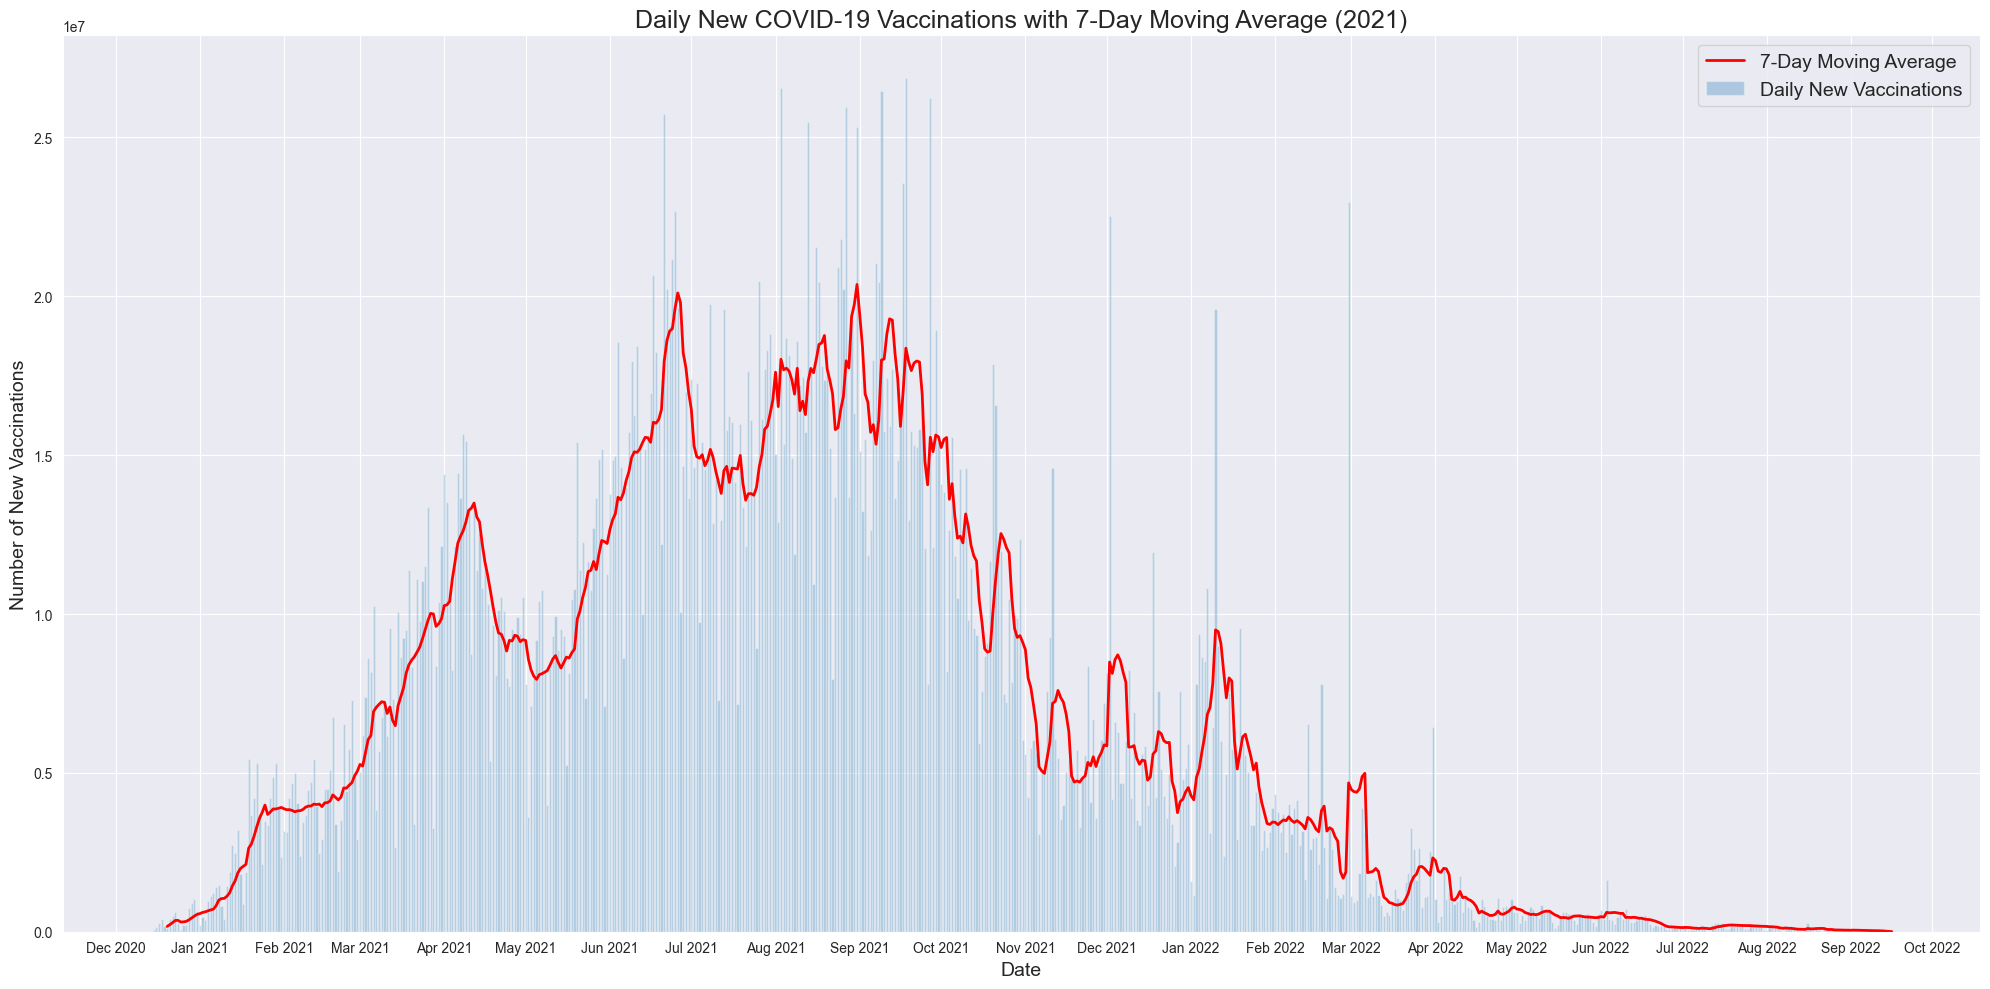

In [79]:
# Prepare data for time series analysis
# We'll use the 'new_persons_vaccinated' column from df_daily
ts_new_vaccinations = df_daily.set_index('date')['new_persons_vaccinated']

# Overlay moving average on part 1 visualization
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['new_persons_vaccinated'], alpha=0.3, label='Daily New Vaccinations')
plt.plot(df_daily['date'], df_daily['rolling_mean_vaccinations'], color='red', linewidth=2, label='7-Day Moving Average')

# Add title and axis labels
plt.title('Daily New COVID-19 Vaccinations with 7-Day Moving Average (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Vaccinations', fontsize=14)
plt.legend(fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()


2.4 Analiza szeregu czasowego liczby osób w pełni zaszczepionych

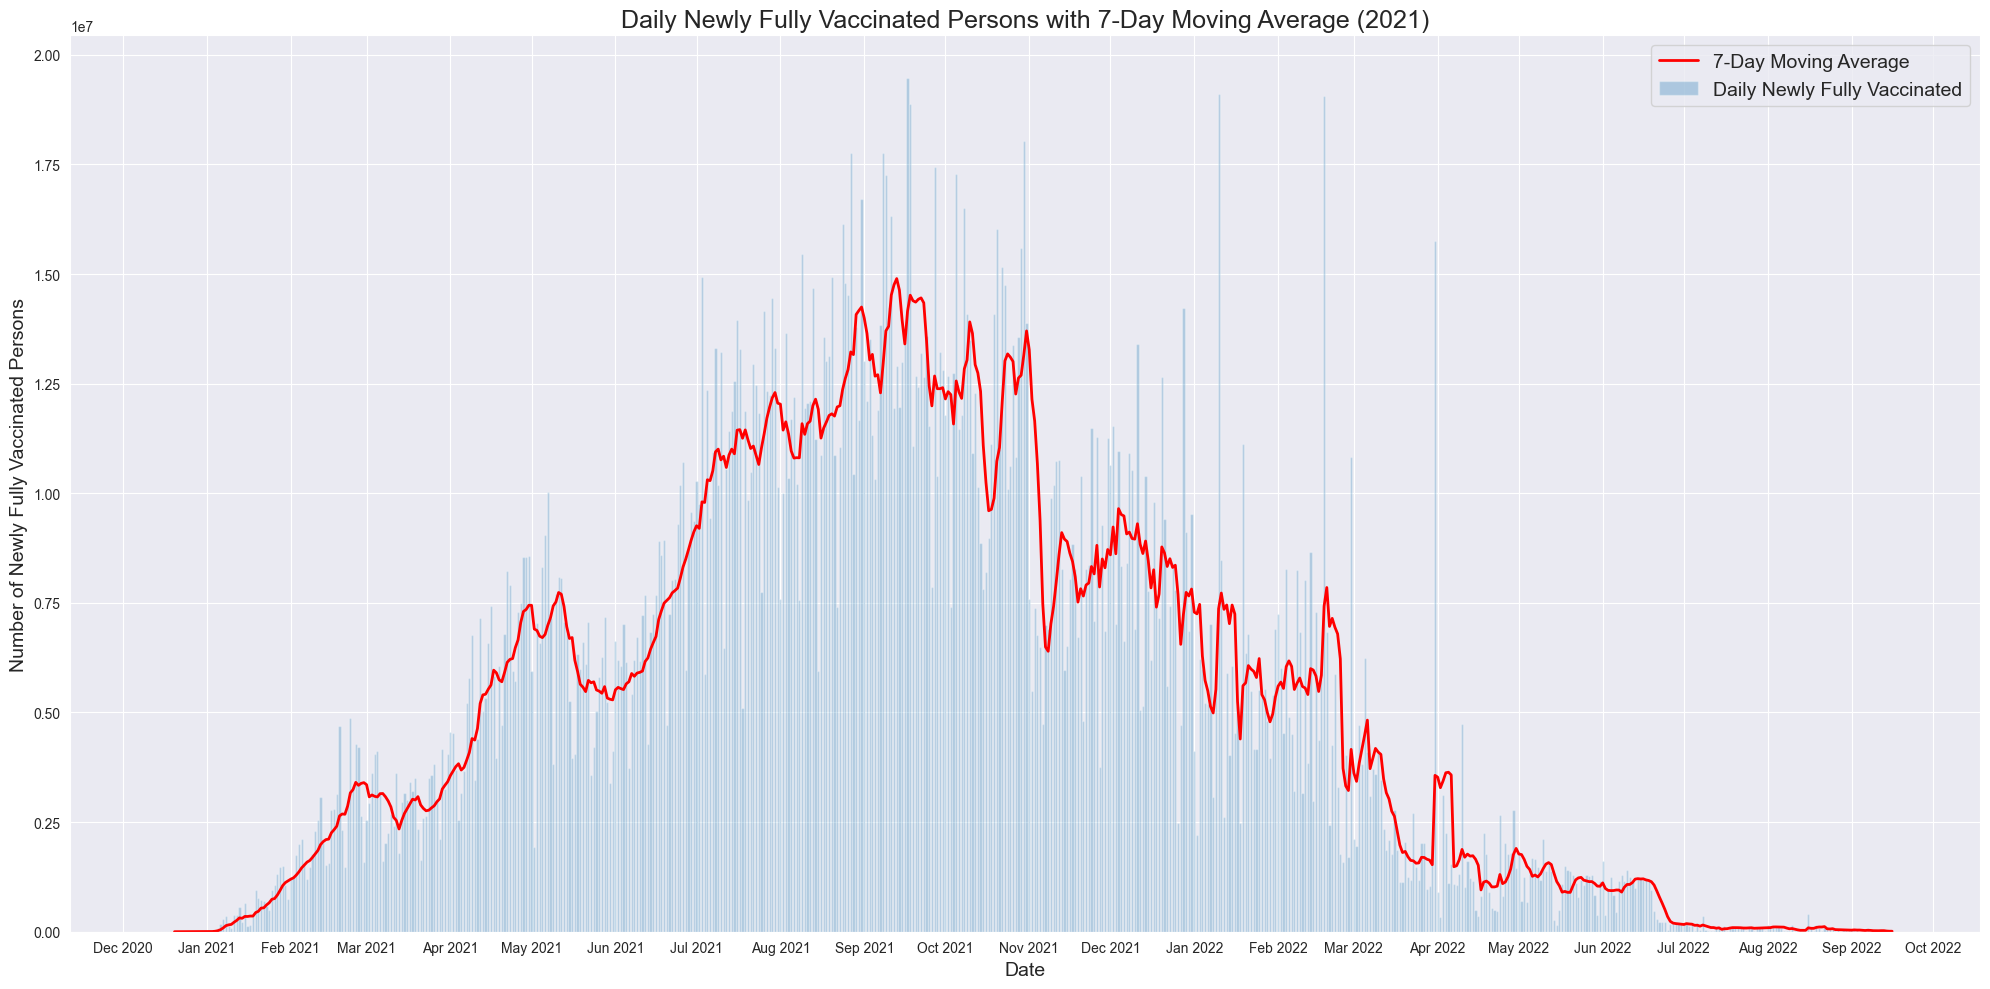

In [80]:
# Prepare data for time series analysis
# We'll use the 'new_persons_fully_vaccinated' column from df_daily
ts_fully_vaccinated = df_daily.set_index('date')['new_persons_fully_vaccinated']

# Overlay moving average on part 1 visualization
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['new_persons_fully_vaccinated'], alpha=0.3, label='Daily Newly Fully Vaccinated')
plt.plot(df_daily['date'], df_daily['rolling_mean_fully_vaccinated'], color='red', linewidth=2, label='7-Day Moving Average')

# Add title and axis labels
plt.title('Daily Newly Fully Vaccinated Persons with 7-Day Moving Average (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Newly Fully Vaccinated Persons', fontsize=14)
plt.legend(fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()


2.5 Analiza szeregu czasowego liczby zaaplikowanych szczepionek

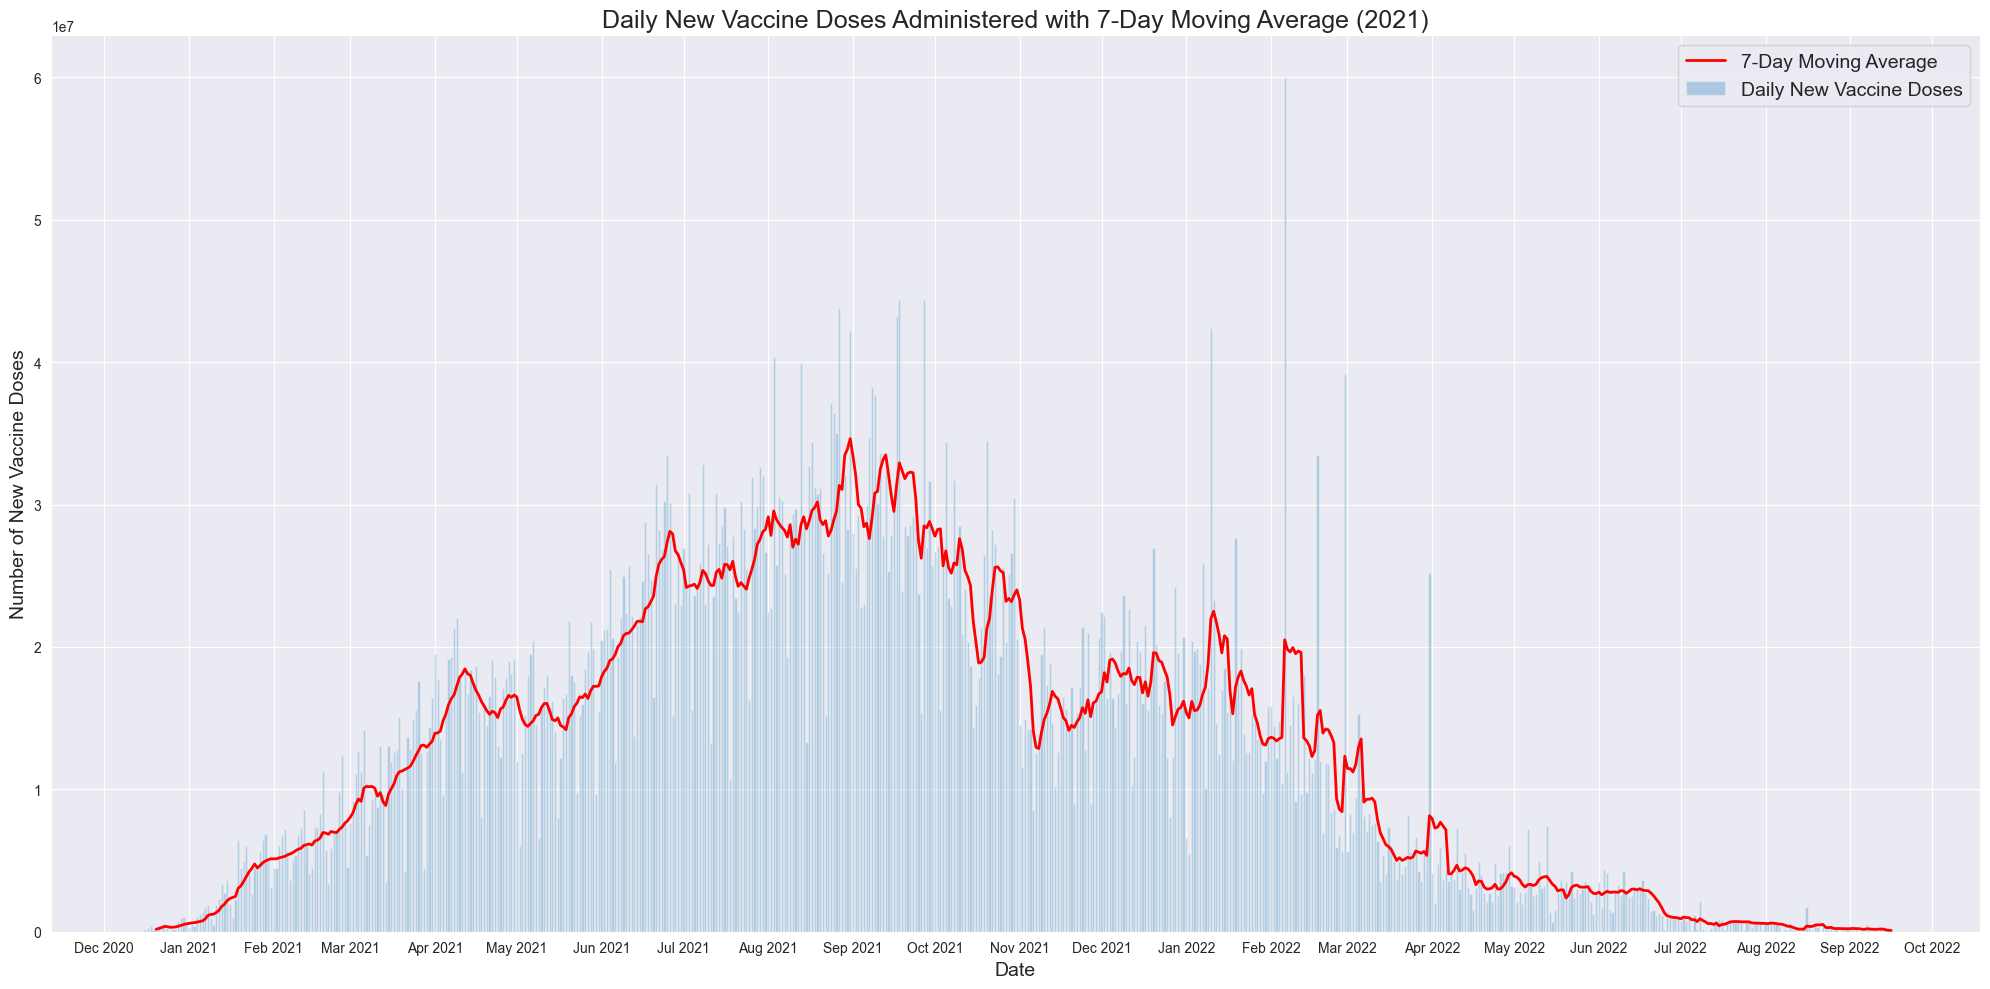

In [81]:
# Prepare data for time series analysis
# We'll use the 'new_vaccine_doses_administered' column from df_daily
ts_doses = df_daily.set_index('date')['new_vaccine_doses_administered']

# Overlay moving average on part 1 visualization
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['new_vaccine_doses_administered'], alpha=0.3, label='Daily New Vaccine Doses')
plt.plot(df_daily['date'], df_daily['rolling_mean_doses'], color='red', linewidth=2, label='7-Day Moving Average')

# Add title and axis labels
plt.title('Daily New Vaccine Doses Administered with 7-Day Moving Average (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Vaccine Doses', fontsize=14)
plt.legend(fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()
